In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/gurgaon_properties_outlier_treated.csv')

In [ ]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
0,flat,signature global park 4,sector 36,0.82,7586.0,1081.0,Super Built up area 1081(100.43 sq.m.)Carpet a...,3.0,2.0,2,...,NaN,650.0,0.0,0.0,0.0,0.0,0.0,1.0,8.0,360.333333
1,flat,smart world gems,sector 89,0.95,8597.0,1105.0,Carpet area: 1103 (102.47 sq.m.),2.0,2.0,2,...,NaN,1103.0,1.0,1.0,0.0,0.0,0.0,1.0,38.0,552.500000
2,flat,breez global hill view,sohna road,0.32,5470.0,585.0,Built Up area: 1000 (92.9 sq.m.)Carpet area: 5...,2.0,2.0,1,...,1000.0,585.0,0.0,0.0,0.0,0.0,0.0,1.0,49.0,292.500000
3,flat,bestech park view sanskruti,sector 92,1.60,8020.0,1995.0,Super Built up area 1995(185.34 sq.m.)Built Up...,3.0,4.0,3+,...,1615.0,1476.0,0.0,1.0,0.0,0.0,1.0,2.0,174.0,665.000000
4,flat,suncity avenue,sector 102,0.48,9023.0,532.0,Super Built up area 632(58.71 sq.m.)Carpet are...,2.0,2.0,1,...,NaN,532.0,0.0,0.0,1.0,0.0,0.0,1.0,159.0,266.000000


In [ ]:
df.isnull().sum()

,0
property_type,0
society,1
sector,0
price,0
price_per_sqft,0
area,0
areaWithType,0
bedRoom,0
bathroom,0
balcony,0


###Built_up_Area

<Axes: xlabel='built_up_area', ylabel='super_built_up_area'>

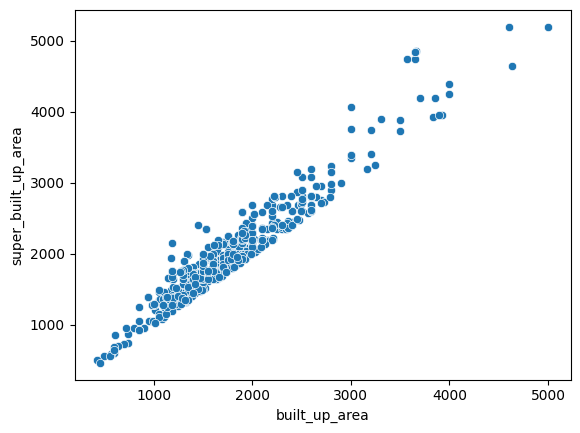

In [ ]:
sns.scatterplot(x=df['built_up_area'],y=df['super_built_up_area'])

<Axes: xlabel='built_up_area', ylabel='carpet_area'>

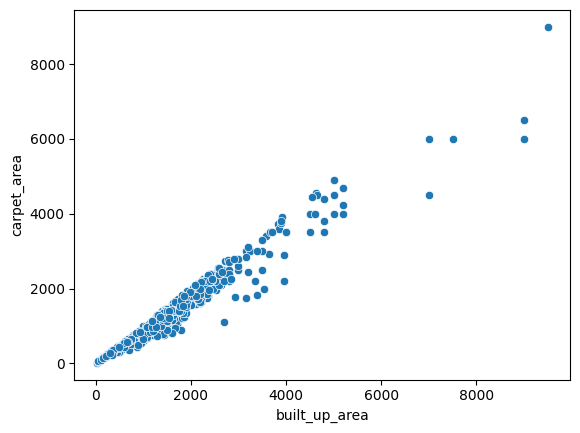

In [ ]:
sns.scatterplot(x=df['built_up_area'],y=df['carpet_area'])

In [ ]:
df.shape

(3594, 24)

In [ ]:

((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))

,0
0,False
1,False
2,False
3,False
4,False
...,...
3589,False
3590,False
3591,False
3592,False


In [ ]:

all_present_df = df[~((df['super_built_up_area'].isnull()) | (df['built_up_area'].isnull()) | (df['carpet_area'].isnull()))]


In [ ]:

all_present_df.shape


(531, 24)

In [ ]:
df.columns

Index(['property_type', 'society', 'sector', 'price', 'price_per_sqft', 'area',
       'areaWithType', 'bedRoom', 'bathroom', 'balcony', 'floorNum', 'facing',
       'agePossession', 'super_built_up_area', 'built_up_area', 'carpet_area',
       'study room', 'servant room', 'store room', 'pooja room', 'others',
       'furnishing_type', 'luxury_score', 'area_room_ratio'],
      dtype='object')

In [ ]:
# First, ensure numerical columns only
numerical_cols = df.select_dtypes(include=['number']).columns

# Focus columns: area-related
area_cols = ['built_up_area', 'super_built_up_area', 'carpet_area']

# Generate correlation matrix
corr_matrix = df[numerical_cols].corr()

# Extract correlations of area-related columns with all other numerical columns
for col in area_cols:
    print(f"\n🔹 Correlation of '{col}' with other columns:")
    display(corr_matrix[[col]].sort_values(by=col, ascending=False))



🔹 Correlation of 'built_up_area' with other columns:


,built_up_area
built_up_area,1.000000
carpet_area,0.971108
super_built_up_area,0.954333
area,0.747262
price,0.611054
area_room_ratio,0.493948
bedRoom,0.463491
bathroom,0.418244
servant room,0.370996
pooja room,0.259868



🔹 Correlation of 'super_built_up_area' with other columns:


,super_built_up_area
super_built_up_area,1.000000
area,0.968765
built_up_area,0.954333
carpet_area,0.924138
price,0.769412
bathroom,0.740212
bedRoom,0.734787
area_room_ratio,0.731892
servant room,0.553620
price_per_sqft,0.282429



🔹 Correlation of 'carpet_area' with other columns:


,carpet_area
carpet_area,1.000000
built_up_area,0.971108
super_built_up_area,0.924138
area,0.793377
price,0.583092
area_room_ratio,0.581700
bedRoom,0.516780
bathroom,0.509396
servant room,0.400716
luxury_score,0.152886


In [ ]:
super_to_built_up_ratio = (all_present_df['super_built_up_area']/all_present_df['built_up_area']).median()

super_to_built_up_ratio

1.105263157894737

In [ ]:

carpet_to_built_up_ratio = (all_present_df['carpet_area']/all_present_df['built_up_area']).median()
carpet_to_built_up_ratio

0.9

## Summary of the Code for Imputation Using MICE:

**1. Custom Initial Imputation:**
- Uses predefined ratios (`super_built_up_area/built_up_area` and `carpet_area/built_up_area`) to fill missing values in `built_up_area` based on available data (either `super_built_up_area` or `carpet_area`).
- This ensures that we fill `built_up_area` intelligently using the relationships between the columns.

**2. Feature Selection for MICE:**
- Selects important features like `built_up_area`, `carpet_area`, and other relevant columns for imputation based on their correlation.

**3. Applying MICE (Multiple Imputation by Chained Equations):**
- Uses `IterativeImputer` with `RandomForestRegressor` to iteratively predict missing values by modeling them as a function of other features.
- Fills missing values based on relationships between selected features over 10 iterations.

**4. Result:**
- The imputed data replaces missing values in the original DataFrame, ensuring the dataset is complete.

**Why MICE?**
- It provides a more accurate and reliable method for filling missing values by considering feature relationships, compared to simpler methods like mean or median imputation.


In [ ]:
import pandas as pd
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor

# Define custom imputation logic
def custom_initial_imputation(df):
    # Calculate ratios
    super_to_built_up_ratio = (df['super_built_up_area']/df['built_up_area']).median()
    carpet_to_built_up_ratio = (df['carpet_area']/df['built_up_area']).median()

    # 1. Case where both super_built_up_area and carpet_area are present, but built_up_area is missing
    sbc_df = df[~(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & ~(df['carpet_area'].isnull())]
    df.loc[sbc_df.index, 'built_up_area'] = round(((sbc_df['super_built_up_area']/super_to_built_up_ratio) + (sbc_df['carpet_area']/carpet_to_built_up_ratio))/2)

    # 2. Case where super_built_up_area is present, carpet_area is missing, and built_up_area is missing
    sb_df = df[~(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull())]
    df.loc[sb_df.index, 'built_up_area'] = round(sb_df['super_built_up_area']/super_to_built_up_ratio)

    # 3. Case where carpet_area is present, super_built_up_area is missing, and built_up_area is missing
    c_df = df[(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & ~(df['carpet_area'].isnull())]
    df.loc[c_df.index, 'built_up_area'] = round(c_df['carpet_area']/carpet_to_built_up_ratio)

    return df


In [ ]:
# Apply custom imputation strategy first
df = custom_initial_imputation(df)


In [ ]:


# Step 3: Perform MICE imputation on the selected features
# Define the features you want to use for imputation
features = ['built_up_area', 'carpet_area', 'super_built_up_area', 'area',
            'bedRoom', 'bathroom', 'servant room', 'pooja room',
            'area_room_ratio', 'luxury_score', 'floorNum']

# Create a new DataFrame containing only the selected features
df_selected_features = df[features]

# Initialize the IterativeImputer (MICE)
imputer = IterativeImputer(
    estimator=RandomForestRegressor(n_estimators=10, random_state=0),
    max_iter=40,
    tol=1e-3,
    random_state=42
)

# Fit the imputer on the selected features and perform imputation
df_selected_imputed = imputer.fit_transform(df_selected_features)

# Convert the imputed array back to a pandas DataFrame
df_selected_imputed = pd.DataFrame(df_selected_imputed, columns=features)

# Replace the original DataFrame columns with the imputed columns
df[features] = df_selected_imputed


In [ ]:
df.isnull().sum()

,0
property_type,0
society,1
sector,0
price,0
price_per_sqft,0
area,0
areaWithType,0
bedRoom,0
bathroom,0
balcony,0


In [ ]:
df['built_up_area'].describe()

,built_up_area
count,3594.000000
mean,1785.887320
std,1203.310066
min,14.000000
25%,1148.000000
50%,1584.000000
75%,2126.000000
max,12375.000000


In [ ]:
anamoly_df = df[(df['built_up_area'] < 1000) & (df['price'] > 2.5)][['price','area','built_up_area']]


In [ ]:
anamoly_df.shape

(92, 3)

In [ ]:
anamoly_df['built_up_area'] = anamoly_df['area']




df.update(anamoly_df)

<Axes: xlabel='built_up_area', ylabel='price'>

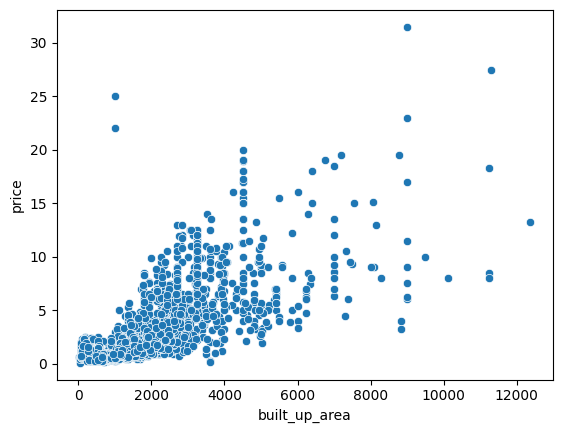

In [ ]:

sns.scatterplot(x=df['built_up_area'],y=df['price'])

In [ ]:
df.columns

Index(['property_type', 'society', 'sector', 'price', 'price_per_sqft', 'area',
       'areaWithType', 'bedRoom', 'bathroom', 'balcony', 'floorNum', 'facing',
       'agePossession', 'super_built_up_area', 'built_up_area', 'carpet_area',
       'study room', 'servant room', 'store room', 'pooja room', 'others',
       'furnishing_type', 'luxury_score', 'area_room_ratio'],
      dtype='object')

In [ ]:

df.drop(columns=['area','areaWithType','super_built_up_area','carpet_area','area_room_ratio'],inplace=True)

In [ ]:
df['floorNum'].describe()

,floorNum
count,3594.000000
mean,6.863759
std,6.036088
min,0.000000
25%,2.000000
50%,5.000000
75%,10.000000
max,51.000000


In [ ]:

df[df['property_type'] == 'house']['floorNum'].median()

3.0

In [ ]:
# Convert non-integer floor numbers to the ceiling value
df['floorNum'] = df['floorNum'].apply(lambda x: np.ceil(x) if not pd.isnull(x) and x != int(x) else x)

##facing

<Axes: ylabel='count'>

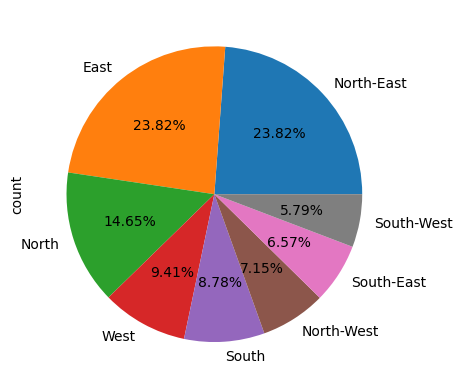

In [ ]:
df['facing'].value_counts().plot(kind='pie',autopct='%0.2f%%')

In [ ]:
df['facing'].value_counts()

,count
facing,
North-East,613
East,613
North,377
West,242
South,226
North-West,184
South-East,169
South-West,149


In [ ]:
df['facing'].isnull().sum()

np.int64(1021)

            count      mean  median
facing                             
North-East    613  2.955938   1.790
North         377  2.910159   1.640
West          242  2.830826   1.740
East          613  2.814731   1.660
South-East    169  2.364675   1.550
South-West    149  2.352081   1.550
North-West    184  2.291413   1.565
South         226  2.021460   1.585


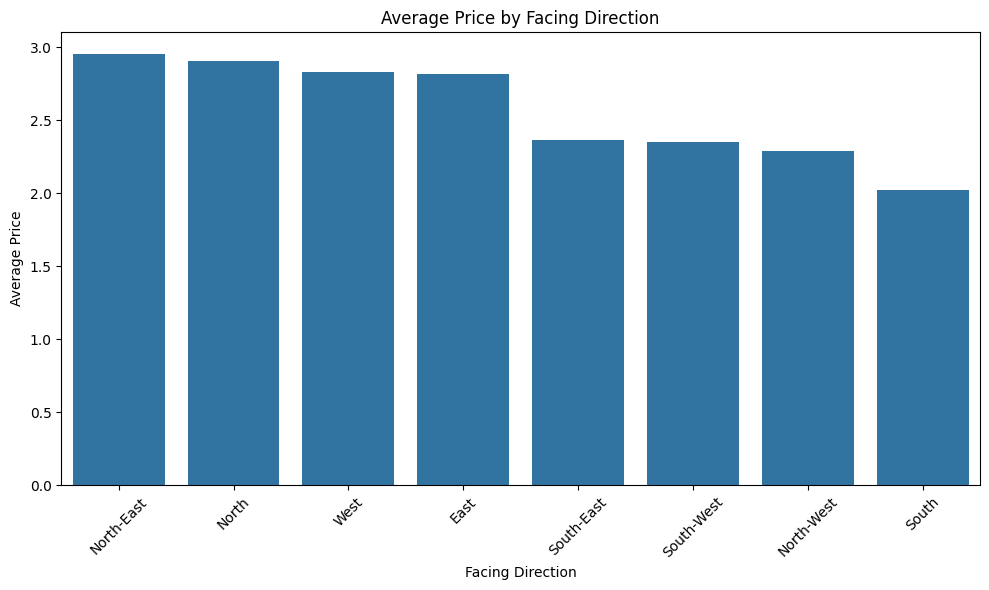

In [ ]:
# Group by 'facing' and calculate average price
facing_price_stats = df.groupby('facing')['price'].agg(['count', 'mean', 'median']).sort_values(by='mean', ascending=False)

# Print the statistics
print(facing_price_stats)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=facing_price_stats.index, y=facing_price_stats['mean'])
plt.title('Average Price by Facing Direction')
plt.xlabel('Facing Direction')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
df.drop(columns=['facing'],inplace=True)

In [ ]:
df.drop(index=[2536],inplace=True)




df.isnull().sum()

,0
property_type,0
society,1
sector,0
price,0
price_per_sqft,0
bedRoom,0
bathroom,0
balcony,0
floorNum,0
agePossession,0


###agePossession

In [ ]:
df['agePossession'].value_counts()

,count
agePossession,
Relatively New,1615
New Property,570
Moderately Old,554
Old Property,296
Undefined,294
Under Construction,264


In [ ]:
df[df['agePossession'] == 'Undefined']


,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
10,house,independent,sector 109,1.55,6568.0,3.0,2.0,0,1.0,Undefined,2360.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
33,house,greenopolis,sector 89,0.70,5397.0,2.0,2.0,2,14.0,Undefined,1297.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
48,flat,smart world gems,sector 89,1.71,12000.0,3.0,2.0,0,3.0,Undefined,1423.0,0.0,0.0,0.0,0.0,0.0,1.0,45.0
71,flat,rof aalayas,sector 102,0.45,6000.0,1.0,1.0,2,6.0,Undefined,750.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
75,house,bhim garh kheri,sector 3,1.50,7576.0,7.0,2.0,0,1.0,Undefined,1980.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3536,flat,raheja vedaanta,sector 108,0.70,4522.0,2.0,2.0,3,1.0,Undefined,1548.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3541,flat,signature global city,sector 37d,1.10,9839.0,2.0,2.0,2,4.0,Undefined,1258.0,0.0,0.0,0.0,0.0,0.0,1.0,59.0
3547,house,independent,sector 21,0.45,8411.0,3.0,2.0,1,1.0,Undefined,602.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3559,flat,sidhartha ncr one,sector 95,0.57,4179.0,2.0,2.0,2,10.0,Undefined,1364.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
df.columns


Index(['property_type', 'society', 'sector', 'price', 'price_per_sqft',
       'bedRoom', 'bathroom', 'balcony', 'floorNum', 'agePossession',
       'built_up_area', 'study room', 'servant room', 'store room',
       'pooja room', 'others', 'furnishing_type', 'luxury_score'],
      dtype='object')

In [ ]:

def mode_based_imputation(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['sector'] == row['sector']) & (df['property_type'] == row['property_type'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0]
        else:
            return np.nan
    else:
        return row['agePossession']



In [ ]:
df['agePossession'] = df.apply(mode_based_imputation,axis=1)




df['agePossession'].value_counts()


,count
agePossession,
3.0,1615
1.0,570
0.0,554
2.0,296
4.0,294
5.0,264


In [ ]:

def mode_based_imputation2(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['sector'] == row['sector'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0]
        else:
            return np.nan
    else:
        return row['agePossession']


In [ ]:

df['agePossession'] = df.apply(mode_based_imputation2,axis=1)




df['agePossession'].value_counts()


,count
agePossession,
3.0,1615
1.0,570
0.0,554
2.0,296
4.0,294
5.0,264


In [ ]:

def mode_based_imputation3(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['property_type'] == row['property_type'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0]
        else:
            return np.nan
    else:
        return row['agePossession']




df['agePossession'] = df.apply(mode_based_imputation3,axis=1)

In [ ]:
# Mapping back to original categorical labels after prediction
age_mapping = {0: 'Relatively New', 1: 'New Property', 2: 'Moderately Old',
               3: 'Old Property', 4: 'Under Construction'}

df['agePossession'] = df['agePossession'].map(age_mapping)

# Verify the updated DataFrame
print(df['agePossession'].value_counts())
print(df.head())


Series([], Name: count, dtype: int64)
   property_type  society  sector  price  price_per_sqft  bedRoom  bathroom  \
0              0      516      40   0.82          7586.0      3.0       2.0   
1              0      529     101   0.95          8597.0      2.0       2.0   
2              0      104     111   0.32          5470.0      2.0       2.0   
3              0       83     105   1.60          8020.0      3.0       4.0   
4              0      556       4   0.48          9023.0      2.0       2.0   

   balcony  floorNum agePossession  built_up_area  study room  servant room  \
0      2.0       2.0           NaN          852.0         0.0           0.0   
1      2.0       4.0           NaN         1241.0         1.0           1.0   
2      1.0      17.0           NaN         1000.0         0.0           0.0   
3      3.0      10.0           NaN         1615.0         0.0           1.0   
4      1.0       5.0           NaN          583.0         0.0           0.0   

   store roo

In [ ]:
df['age_encoded'].value_counts()

,count
age_encoded,
1.0,1615
0.0,570
3.0,554
4.0,296
2.0,264


In [ ]:

df.head()

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,age_encoded
0,0,516,40,0.82,7586.0,3.0,2.0,2.0,2.0,NaN,852.0,0.0,0.0,0.0,0.0,0.0,1,8.0,0.0
1,0,529,101,0.95,8597.0,2.0,2.0,2.0,4.0,NaN,1241.0,1.0,1.0,0.0,0.0,0.0,1,38.0,0.0
2,0,104,111,0.32,5470.0,2.0,2.0,1.0,17.0,NaN,1000.0,0.0,0.0,0.0,0.0,0.0,1,49.0,0.0
3,0,83,105,1.60,8020.0,3.0,4.0,3.0,10.0,NaN,1615.0,0.0,1.0,0.0,0.0,1.0,2,174.0,1.0
4,0,556,4,0.48,9023.0,2.0,2.0,1.0,5.0,NaN,583.0,0.0,0.0,1.0,0.0,0.0,1,159.0,1.0


In [ ]:
import pandas as pd

# Create the mapping based on age_encoded values
age_encoding_mapping = {
    1.0: 'Relatively New',
    0.0: 'New Property',
    3.0: 'Moderately Old',
    4.0: 'Old Property',
    2.0: 'Under Construction'
}

# Apply the transformation using the mapping for the 'agePossession' column
df['agePossession'] = df['age_encoded'].map(age_encoding_mapping)

# If you have 'Undefined' in 'agePossession', fill those values with the mode
mode_value = df['agePossession'].mode()[0]  # Fill Undefined with the most frequent value
df['agePossession'] = df['agePossession'].fillna(mode_value)

# Verify the transformed column
print(df['agePossession'].value_counts())
print(df.head())


agePossession
Relatively New        1909
New Property           570
Moderately Old         554
Old Property           296
Under Construction     264
Name: count, dtype: int64
   property_type  society  sector  price  price_per_sqft  bedRoom  bathroom  \
0              0      516      40   0.82          7586.0      3.0       2.0   
1              0      529     101   0.95          8597.0      2.0       2.0   
2              0      104     111   0.32          5470.0      2.0       2.0   
3              0       83     105   1.60          8020.0      3.0       4.0   
4              0      556       4   0.48          9023.0      2.0       2.0   

   balcony  floorNum   agePossession  built_up_area  study room  servant room  \
0      2.0       2.0    New Property          852.0         0.0           0.0   
1      2.0       4.0    New Property         1241.0         1.0           1.0   
2      1.0      17.0    New Property         1000.0         0.0           0.0   
3      3.0      10.0  Rela

In [ ]:
df['agePossession'].value_counts()

,count
agePossession,
Relatively New,1909
New Property,570
Moderately Old,554
Old Property,296
Under Construction,264


In [ ]:
df.to_csv('gurgaon_properties_missing_value_imputation.csv',index=False)

In [ ]:



from google.colab import files
files.download('gurgaon_properties_missing_value_imputation.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>